# Time Series Forecasting with XGBoost / GBRT

In [28]:
from random import gauss
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
sys.path.insert(2,'..')
import functions
import xgboost as xgb
from sklearn import preprocessing
import annualized_rv as arv
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor # Random Forest model
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting model
from sklearn.ensemble import AdaBoostRegressor # AdaBoost model
import sklearn.ensemble as ensemble

import tensorflow as tf
from tensorflow import keras

import DataProcess

In [29]:
# reads in the historic implied vol data calculated in the dailyaverageIV notebook

aaplHistIV = pd.read_pickle('historicImpliedVolData/aapl_mean_iv_2017_2022.pkl')
googHistIV = pd.read_pickle('historicImpliedVolData/goog_mean_iv_2017_2022.pkl')
msftHistIV = pd.read_pickle('historicImpliedVolData/msft_mean_iv_2017_2022.pkl')
ndxHistIV = pd.read_pickle('historicImpliedVolData/ndx_mean_iv_2017_2022.pkl')
spyHistIV = pd.read_pickle('historicImpliedVolData/spc_mean_iv_2017_2022.pkl')




In [30]:

X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21) #preprocess spy 
X_train_reshape = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_reshape = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
#reshape data for xgboost
def reshape2d(X_train,X_test):
    X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
    return X_train,X_test

In [31]:
def modelandeval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    MSE,RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test, y_pred)
    
    return RMSE, MAE, R2, MSE

In [32]:
#XGBoost model

model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.21991062797022953,
 0.17311773731482058,
 0.47953121360780104,
 0.0483606842942607)

In [33]:
#RandomForestModel
model = ensemble.RandomForestRegressor(n_estimators=100) # reccomended forest tree size
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.20167229059689526,
 0.15555989431008957,
 0.5622816900213097,
 0.040671712794598566)

In [34]:
#GBRT Model
model =ensemble.GradientBoostingRegressor()
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)


(0.20045185612310418,
 0.15307376879904414,
 0.5675634282216453,
 0.04018094662319766)

In [35]:
#AdaBoost Model
model = ensemble.AdaBoostRegressor()
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.2662655971289159,
 0.21761078110714738,
 0.23698624758007736,
 0.07089736821441814)

In [36]:
#STACKING MODEL 

estimators = [
    ('rf', ensemble.RandomForestRegressor(n_estimators=100)),
    ('gbrt', ensemble.GradientBoostingRegressor()),
    ('xgb', xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000))
]

model = ensemble.StackingRegressor(estimators=estimators, final_estimator=ensemble.RandomForestRegressor(n_estimators=100))
modelandeval(model,X_train_reshape, X_test_reshape, y_train, y_test)

(0.23724663377076785,
 0.1839884397165235,
 0.3942375207345338,
 0.05628596523556084)

C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5891
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1526
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1945
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.1190
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.1052
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0948
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0839
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0985
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0925
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0794
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0745
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0951
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0824
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0791
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0702
Epoc

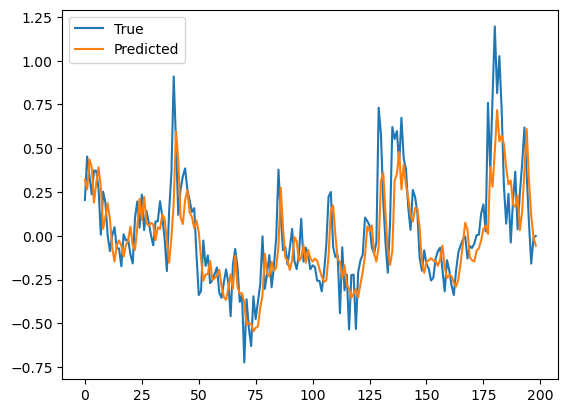

In [37]:
#LSTM Model
seq_length = 100

model = keras.models.Sequential([
    keras.layers.LSTM(seq_length, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.LSTM(seq_length),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

# pass tensors instead of numpy arrays
X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32)
y_pred = model.predict(X_test_tensor)
y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency

DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
DataProcess.plot(y_test_tensor, y_pred)

# Evaluation

# Using other data

In [38]:
# Preprocess data for other tickers

X_train_app, X_test_app, y_train_app, y_test_app = DataProcess.preprocess_data(aaplHistIV, 'AAPL', seq_length=60, splits=5, window=21)
X_train_app_reshape = X_train_app.reshape(X_train_app.shape[0],X_train_app.shape[1]*X_train_app.shape[2])
X_test_app_reshape = X_test_app.reshape(X_test_app.shape[0],X_test_app.shape[1]*X_test_app.shape[2])

X_train_goog, X_test_goog, y_train_goog, y_test_goog = DataProcess.preprocess_data(googHistIV, 'GOOG', seq_length=60, splits=5, window=21)
X_train_goog_reshape = X_train_goog.reshape(X_train_goog.shape[0],X_train_goog.shape[1]*X_train_goog.shape[2])
X_test_goog_reshape = X_test_goog.reshape(X_test_goog.shape[0],X_test_goog.shape[1]*X_test_goog.shape[2])

X_train_msft, X_test_msft, y_train_msft, y_test_msft = DataProcess.preprocess_data(msftHistIV, 'MSFT', seq_length=60, splits=5, window=21)
X_train_msft_reshape = X_train_msft.reshape(X_train_msft.shape[0],X_train_msft.shape[1]*X_train_msft.shape[2])
X_test_msft_reshape = X_test_msft.reshape(X_test_msft.shape[0],X_test_msft.shape[1]*X_test_msft.shape[2])

# X_train_ndx, X_test_ndx, y_train_ndx, y_test_ndx = DataProcess.preprocess_data(ndxHistIV, 'NDX', seq_length=60, splits=5, window=21)
# X_train_ndx_reshape = X_train_ndx.reshape(X_train_ndx.shape[0],X_train_ndx.shape[1]*X_train_ndx.shape[2])  # Data issues /FIX 
# X_test_ndx_reshape = X_test_ndx.reshape(X_test_ndx.shape[0],X_test_ndx.shape[1]*X_test_ndx.shape[2])

X_train_spy, X_test_spy, y_train_spy, y_test_spy = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21)
X_train_spy_reshape = X_train_spy.reshape(X_train_spy.shape[0],X_train_spy.shape[1]*X_train_spy.shape[2])
X_test_spy_reshape = X_test_spy.reshape(X_test_spy.shape[0],X_test_spy.shape[1]*X_test_spy.shape[2])


In [39]:
# Combine the training and test sets into appropriate tuples for models
X_train_reshape_list = [X_train_app_reshape, X_train_goog_reshape, X_train_msft_reshape, X_train_spy_reshape]
X_test_reshape_list = [X_test_app_reshape, X_test_goog_reshape, X_test_msft_reshape, X_test_spy_reshape]
y_train_reshape_list = [y_train_app, y_train_goog, y_train_msft, y_train_spy]
y_test_reshape_list = [y_test_app, y_test_goog, y_test_msft, y_test_spy]


In [40]:
def average_metrics(model,X_train, X_test, y_train, y_test):
    RMSE, MAE, R2,MSE = 0,0,0,0
    for X_train, X_test, y_train, y_test in zip(X_train, X_test, y_train, y_test):
        RMSE_, MAE_, R2_, MSE_ = modelandeval(model,X_train, X_test, y_train, y_test)
        RMSE += RMSE_
        MAE += MAE_
        R2 += R2_
        MSE += MSE_
    print(f'Average RMSE: {RMSE/4}')
    print(f'Average MAE: {MAE/4}')
    print(f'Average R2: {R2/4}')
    print(f'Average MSE: {MSE/4}')
    return None

In [41]:
# xgboost model
model = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000)
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)




Average RMSE: 0.2854948037620782
Average MAE: 0.21926092939376757
Average R2: 0.5602175248375658
Average MSE: 0.08338524382516437


In [42]:
#RandomForestModel
model = ensemble.RandomForestRegressor(n_estimators=100) # reccomended forest tree size
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)

Average RMSE: 0.25718795413116174
Average MAE: 0.19595120813050523
Average R2: 0.6358340741543936
Average MSE: 0.06770358975296158


In [43]:
#GBRT Model

model =ensemble.GradientBoostingRegressor()
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)                 

Average RMSE: 0.2637671301021554
Average MAE: 0.20111553873935972
Average R2: 0.6270559078578957
Average MSE: 0.07145403110851378


In [44]:
#Bagging Model
model = ensemble.BaggingRegressor()
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)

Average RMSE: 0.26724811568527584
Average MAE: 0.20615390616488843
Average R2: 0.606708811396895
Average MSE: 0.07282754831941747


In [45]:
#STACKING MODEL

estimators = [
    ('rf', ensemble.RandomForestRegressor(n_estimators=100)),
    ('gbrt', ensemble.HistGradientBoostingRegressor()),
    ('bag',ensemble.BaggingRegressor()),
    ('xgb', xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=1000))
]

model = ensemble.StackingRegressor(estimators=estimators, final_estimator=ensemble.RandomForestRegressor(n_estimators=100))
average_metrics(model,X_train_reshape_list, X_test_reshape_list, y_train_reshape_list, y_test_reshape_list)

Average RMSE: 0.2824828920859422
Average MAE: 0.21781168132087775
Average R2: 0.555702393373473
Average MSE: 0.08102841279469328


In [46]:
X_train_lstm = [X_train_app, X_train_goog, X_train_msft, X_train_spy]
X_test_lstm = [X_test_app ,X_test_goog, X_test_msft, X_test_spy]
y_train_lstm = [y_train_app, y_train_goog, y_train_msft, y_train_spy]
y_test_lstm = [y_test_app, y_test_goog, y_test_msft, y_test_spy]


In [47]:
#LSTM Model
seq_length = 60

model = keras.models.Sequential([
    keras.layers.LSTM(seq_length, return_sequences=True, input_shape=(X_train_lstm[0].shape[1], X_train_lstm[0].shape[2])),
    keras.layers.LSTM(seq_length),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')




C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
rmse, mae, r2, mse  = 0,0,0,0

for X_train, X_test, y_train, y_test in zip(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm):
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
    model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32)
    y_pred = model.predict(X_test_tensor)
    y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency
    MSE, RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
    rmse += RMSE
    mae += MAE
    r2 += R2
    mse += MSE

print(f'Average RMSE: {rmse/4}')
print(f'Average MAE: {mae/4}')
print(f'Average R2: {r2/4}')
print(f'Average MSE: {mse/4}')

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.5771
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2014
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1443
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1629
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1225
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1326
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1251
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1176
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1096
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1088
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1163
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1009
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1142
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0868
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0977
Epoc

In [ ]:
#gru model
model = keras.models.Sequential([
    keras.layers.GRU(seq_length, return_sequences=True, input_shape=(X_train_lstm[0].shape[1], X_train_lstm[0].shape[2])),
    keras.layers.GRU(seq_length),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
rmse, mae, r2, mse  = 0,0,0,0
allhistory= []
for X_train, X_test, y_train, y_test in zip(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm):
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
    history = model.fit(X_train_tensor, y_train_tensor, epochs=50, batch_size=32)
    y_pred = model.predict(X_test_tensor)
    y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency
    MSE, RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
    rmse += RMSE
    mae += MAE
    r2 += R2
    mse += MSE
print(f'Average RMSE: {rmse/4}')
print(f'Average MAE: {mae/4}')
print(f'Average R2: {r2/4}')
print(f'Average MSE: {mse/4}')